In [1]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def load_data(to_plot_boundary = True):
    iris = datasets.load_iris()
    # can just use two features if we want to plot the decision boundary
    if to_plot_boundary:
        # fetching all rows and first 2 cols (features)
        x = iris.data[:, 0:2] 
    else:
        x = iris.data
    y = iris.target
    return x, y

In [3]:
def train_test_data(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    return x_train, x_test, y_train, y_test

In [4]:
def train_predict(x_train, x_test, y_train, y_test, kernel = 'rbf'):
    clf = svm.SVC(kernel = kernel)
    clf.fit(x_train, y_train)
    print('Test Score:', clf.score(x_test, y_test))
    return clf

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [5]:
# (Bruteforece way to) creates all possible combination between the ranges between the given range bounds 
def makegrid(x1, x2, h = 0.02):
    # taking a 1 extra from the given range
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    # will create all possible combinations between the 2 arrays
    xx, yy = np.meshgrid(a, b)
    return xx, yy

In [6]:
# Plotting the decision boundary
def plot_boundary(x, y, clf):
    xx, yy = makegrid(x[:, 0], x[:, 1])
    # Ravel converts the matrix into a huge 1-D array
    predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
    plt.show()

In [7]:
def run(to_plot_boundary = True):
    x, y = load_data(to_plot_boundary)
    x_train, x_test, y_train, y_test = train_test_data(x, y)
    kernel = 'rbf'
    clf = train_predict(x_train, x_test, y_train, y_test, kernel = kernel)
    if to_plot_boundary:
        plot_boundary(x, y, clf)

Test Score: 0.8157894736842105


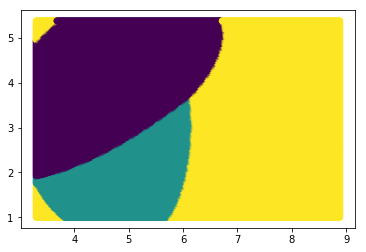

In [8]:
run(to_plot_boundary = True)